### Imports

In [1]:
from Garage import Augmenter
from PIL import Image

%load_ext autoreload
%autoreload 2

### Model initialization

In [2]:
model = Augmenter()

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

An error occurred while trying to fetch /home/jovyan/ddorin/generative_augmentation/Garage/Garage/models/checkpoints/ppt-v2-1/realisticVisionV60B1_v51VAE/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /home/jovyan/ddorin/generative_augmentation/Garage/Garage/models/checkpoints/ppt-v2-1/realisticVisionV60B1_v51VAE/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /home/jovyan/ddorin/generative_augmentation/Garage/Garage/models/checkpoints/ppt-v2-1/realisticVisionV60B1_v51VAE/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /home/jovyan/ddorin/generative_augmentation/Garage/Garage/models/checkpoints/ppt-v2-1/realisticVisionV60B1_v51VAE/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
/home/jovyan/.mlspace/envs/gen_aug/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.p

10/04 11:47:12 - mmengine - INFO - Successfully add external embeddings: P_ctxt, P_shape, P_obj.
10/04 11:47:12 - mmengine - INFO - Successfully add trainable external embeddings: P_ctxt, P_shape, P_obj


/home/jovyan/ddorin/generative_augmentation/Garage/Garage/models/PowerPaintModel.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  torch.load(os.path.join(self.checkpoint

### Examples of working

In [3]:
image = Image.open("examples/image.jpg")
cat_mask = Image.open("examples/cat_mask.jpg")

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  0%|          | 0/50 [00:00<?, ?it/s]

New object: dog, prompt: This dog is a large, brown, black and white, adult male, with a black nose and floppy ears.



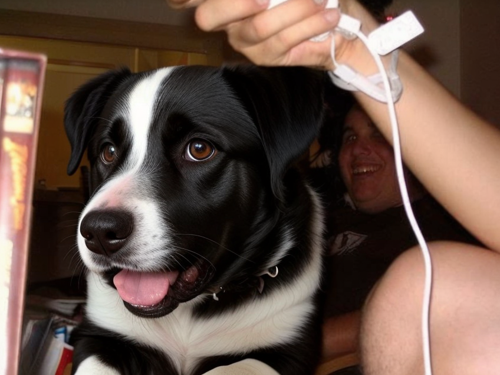

In [5]:
new_image, (prompt, new_object) = model(image=image,
                                    mask=cat_mask,
                                    current_object="cat",
                                    new_objects_list=None,
                                    ddim_steps=50,
                                    guidance_scale=5,
                                    seed=42,
                                    return_prompt=True)

print(f'New object: {new_object}, prompt: {prompt}\n')
new_image.show()

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


  0%|          | 0/50 [00:00<?, ?it/s]

New object: bear, prompt: The bear is a large, brown creature with a round head and a long snout. It is standing on all fours and looking directly at the camera. The bear's fur is a mix of brown and black, and its eyes are a deep,



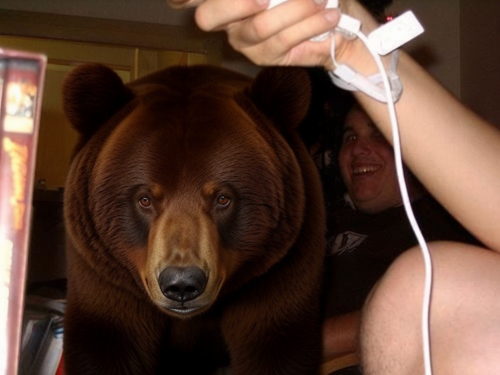

In [5]:
new_image, (prompt, new_object) = model(image=image,
                                    mask=cat_mask,
                                    current_object="cat",
                                    new_objects_list=["wolf", "train", "tree", "rabbit", "bear", "car"],
                                    ddim_steps=50,
                                    guidance_scale=5,
                                    seed=42,
                                    return_prompt=True)

print(f'New object: {new_object}, prompt: {prompt}\n')
new_image.show()